In [1]:
from imutils import paths
import os
import keras
from keras.preprocessing import image as image_utils
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
imagePaths = list(paths.list_images("ISIC2018_Task1-2_Training_Input"))
groundTruthPaths = list(paths.list_images("ISIC2018_Task1_Training_GroundTruth"))
#validationPaths = list(paths.list_images("ISIC2018_Task1-2_Validation_Input"))
#testPaths = list(paths.list_images("ISIC2018_Task1-2_Test_Input"))

print("Total training data:{}".format(len(imagePaths)))
print("Total ground truth data:{}".format(len(groundTruthPaths)))
#print("Total validation data:{}".format(len(validationPaths)))
#print("Total testing data:{}".format(len(testPaths)))


Total training data:2594
Total ground truth data:2594


In [3]:
def showSampleImages(imagePaths, sampleImages = 20, perRow=5):
    nrow = int(sampleImages / perRow)

    idx = 0
    bigImage = np.zeros((50*nrow, 50*perRow, 3))
    for imagePath in imagePaths[:sampleImages]:
        image = img_to_array(load_img(imagePath, target_size=(50, 50)))
        ix = idx % perRow
        iy = int(idx / perRow)
        bigImage[50*iy:50*(iy+1), 50 * ix:50*(ix+1)] = image
        idx += 1
    plt.imshow(array_to_img(bigImage))

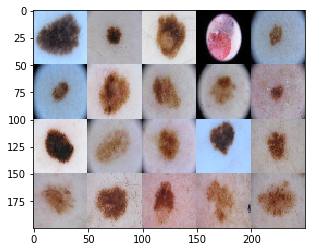

In [4]:
showSampleImages(np.sort(imagePaths), sampleImages = 20, perRow = 5)

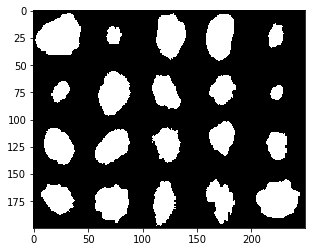

In [5]:
showSampleImages(np.sort(groundTruthPaths), sampleImages = 20, perRow = 5)

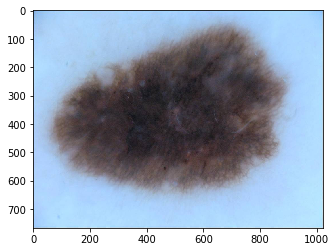

In [6]:
sample_image = load_img(imagePaths[0])
plt.imshow(sample_image)

In [7]:
#Prepare data
raw_image_dir = 'ISIC2018_Task1-2_Training_Input'
raw_mask_dir = 'ISIC2018_Task1_Training_GroundTruth'

root_dir = './data'
training_data_dir = os.path.join(root_dir, 'train/images')
training_data_mask_dir = os.path.join(root_dir, 'train/masks')
val_data_dir = os.path.join(root_dir, 'val/images')
val_data_pred_dir = os.path.join(root_dir, 'val/predict')
val_data_mask_dir = os.path.join(root_dir, 'val/masks')

test_data_dir = os.path.join(root_dir, 'test/images')
test_data_pred_dir = os.path.join(root_dir, 'test/predict')
test_data_mask_dir = os.path.join(root_dir, 'test/masks')

output_dir = os.path.join(root_dir,'output')
os.makedirs(training_data_dir, exist_ok =True)
os.makedirs(training_data_mask_dir, exist_ok =True)
os.makedirs(val_data_dir, exist_ok =True)
os.makedirs(val_data_pred_dir, exist_ok =True)
os.makedirs(val_data_mask_dir, exist_ok =True)
os.makedirs(test_data_dir, exist_ok =True)
os.makedirs(test_data_pred_dir, exist_ok =True)
os.makedirs(test_data_mask_dir, exist_ok =True)
os.makedirs(output_dir, exist_ok =True)

In [8]:
ratio = 0.4# 20% as training, 30% as testing

from sklearn.model_selection import train_test_split
file_names = next(os.walk(raw_image_dir))[2]
train, validate_test = train_test_split(file_names, test_size=ratio)
validate, test = train_test_split(validate_test, test_size=0.5)



In [9]:
from shutil import copyfile

#copy training data
for img in train:
    if img[-3:] == 'jpg':
        source_file = os.path.join(raw_image_dir, img)
        dst_file = os.path.join(training_data_dir,img)
        copyfile(source_file,dst_file)

        #Find the masking file
        file_id = img.split('.')[0]
        mask_file = file_id + '_segmentation.png'
        source_mask_file = os.path.join(raw_mask_dir, mask_file)
        dst_file = os.path.join(training_data_mask_dir,mask_file)
        copyfile(source_mask_file,dst_file)



In [10]:
#copy validate file
for img in validate:
    if img[-3:] == 'jpg':
        source_file = os.path.join(raw_image_dir, img)
        dst_file = os.path.join(val_data_dir,img)
        copyfile(source_file,dst_file)

        #Find the masking file
        file_id = img.split('.')[0]
        mask_file = file_id + '_segmentation.png'
        source_mask_file = os.path.join(raw_mask_dir, mask_file)
        dst_file = os.path.join(val_data_mask_dir,mask_file)
        copyfile(source_mask_file,dst_file)

In [11]:
#copy test file
for img in test:
    if img[-3:] == 'jpg':
        source_file = os.path.join(raw_image_dir, img)
        dst_file = os.path.join(test_data_dir,img)
        copyfile(source_file,dst_file)

        #Find the masking file
        file_id = img.split('.')[0]
        mask_file = file_id + '_segmentation.png'
        source_mask_file = os.path.join(raw_mask_dir, mask_file)
        dst_file = os.path.join(test_data_mask_dir,mask_file)
        copyfile(source_mask_file,dst_file)